# New York City Taxi Fare Prediction
<img src= "https://miro.medium.com/max/1200/1*-Oa3eUBRoF4uzvJkp9OV_Q.jpeg" alt ="Titanic" style='width:8600px;'>

Image Credit : <a href="https://medium.com/analytics-vidhya/new-york-city-taxi-fare-prediction-1ba96223ba7e">Medium article</a>


Let's train a machine learning model to predict the fare for a taxi ride in New York city given information like pickup date & time, pickup location, drop location and no. of passengers. 

Dataset Link: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction


## Step 1. Loading the Dataset

- Install required libraries
- Download data from Kaggle or Use Kaggle Notebook for using data without downloading
- View dataset files
- Load training and test set with Pandas

### Load dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv
/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv


In [2]:
data_dir = '/kaggle/input/new-york-city-taxi-fare-prediction'

### View Dataset Files

In [3]:
# List of files with size
!ls -lh {data_dir}

total 5.4G
-rw-r--r-- 1 nobody nogroup  486 Jan  2 16:47 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 nobody nogroup 336K Jan  2 16:47 sample_submission.csv
-rw-r--r-- 1 nobody nogroup 960K Jan  2 16:47 test.csv
-rw-r--r-- 1 nobody nogroup 5.4G Jan  2 16:48 train.csv


As we can see training file is too large. so before loading it into dataframe let's take a look at training data using shell commands

In [4]:
# Training dataset
!head {data_dir}/train.csv

In [5]:
# Test dataset
!head {data_dir}/test.csv

In [6]:
# sample_submission file
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


In [7]:
# count number of lines in training dataset
!wc -l {data_dir}/train.csv

55423856 /kaggle/input/new-york-city-taxi-fare-prediction/train.csv


In [8]:
# count number of lines in test dataset
!wc -l {data_dir}/test.csv

9914 /kaggle/input/new-york-city-taxi-fare-prediction/test.csv


In [9]:
# No. of lines in sample_submission file
!wc -l {data_dir}/sample_submission.csv

9915 /kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv


Observations:

- This is a supervised learning regression problem
- Training data is 5.5 GB in size and consist of 55.4 M rows
- Test set is much smaller (only ≈ 10 K rows)
- 8 fetures present:
    - `key` (unique ID field, used in submission)
    - `pickup_datetime`
    - `pickup_longitude`
    - `pickup_latitude`
    - `dropoff_longitude`
    - `dropoff_latitude`
    - `passenger_count`
    - `fare_amount` (target column)

- The test set has all columns except the target column.

### Loading Training and test Dataset into pandas

Loading the entire dataset into pandas dataframe will be slow, let's take following measures

- Because 'key' column can not be used for prediction. Ignore it.
- Parse pickup_datetime 
- Specify data types for other columns
   - `uint8` for passenger count
   - `float32` for geo coordinates
   - `float32` for fare amount
   
- Only use 5% sample of the data for model training for now (≈2.77M rows)

In [10]:
import pandas as pd
import random
from datetime import datetime

In [11]:
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'dropoff_latitude' : 'float32',
    'passenger_count': 'uint8'
}

In [12]:
%%time

frac = 0.02
def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > frac

random.seed(10)
# dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

taxi_df = pd.read_csv(data_dir+"/train.csv", 
                 usecols=selected_cols, 
                 dtype=dtypes, 
                 parse_dates=['pickup_datetime'],
                 skiprows=skip_row)

CPU times: user 3min 18s, sys: 1.35 s, total: 3min 19s
Wall time: 3min 20s


In [13]:
taxi_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,9.3,2012-05-04 06:11:20+00:00,-73.989258,40.690834,-74.004135,40.725689,1
1,16.5,2014-12-08 16:00:01+00:00,-73.982803,40.745289,-74.014252,40.702934,1
2,9.7,2010-11-08 20:42:00+00:00,-73.970703,40.761642,-73.992836,40.727646,2
3,5.5,2013-01-05 21:36:00+00:00,-73.989693,40.735497,-73.982010,40.739391,1
4,7.3,2011-02-27 14:45:00+00:00,-73.983757,40.746429,-73.963554,40.774090,1
...,...,...,...,...,...,...,...
1108944,15.7,2009-02-14 20:55:41+00:00,-73.936462,40.853058,-73.972488,40.791531,1
1108945,14.0,2013-10-04 23:46:00+00:00,-73.992722,40.716663,-73.982353,40.691486,6
1108946,6.0,2014-08-18 09:02:20+00:00,-73.950432,40.775360,-73.955780,40.764072,2
1108947,5.5,2012-10-19 09:25:00+00:00,-73.958313,40.773880,-73.960106,40.766159,3


In [14]:
type(taxi_df.pickup_datetime[0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
# Load Test Set
test_df = pd.read_csv(data_dir+'/test.csv', dtype=dtypes, parse_dates=['pickup_datetime'])

In [16]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6


## Step 2. Data Cleaning, Data Visualization and Feature Engineering

- Basic info about training set
- Basic info about test set
- Remove noise and outliers
- Exploratory data analysis & visualization
- Ask & answer questions
- Add features to dataset

### Training Dataset

In [17]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108949 entries, 0 to 1108948
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype              
---  ------             --------------    -----              
 0   fare_amount        1108949 non-null  float32            
 1   pickup_datetime    1108949 non-null  datetime64[ns, UTC]
 2   pickup_longitude   1108949 non-null  float32            
 3   pickup_latitude    1108949 non-null  float32            
 4   dropoff_longitude  1108942 non-null  float32            
 5   dropoff_latitude   1108942 non-null  float32            
 6   passenger_count    1108949 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 30.7 MB


In [18]:
taxi_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.10895e+06,1.10895e+06,1.10895e+06,1.10894e+06,1.10894e+06,1.10895e+06
mean,11.3288,-71.6203,39.5129,-71.6233,39.5119,1.68511
std,9.74374,11.7451,8.74535,12.453,7.92935,1.35172
min,-145,-2633.91,-3114.29,-2953.98,-3117.51,0
25%,6,-73.9921,40.735,-73.9914,40.734,1
50%,8.5,-73.9818,40.7527,-73.9802,40.7531,1
75%,12.5,-73.9671,40.7672,-73.9637,40.768,2
max,542.83,2469.16,3348.68,2469.16,2878.88,208


In [19]:
taxi_df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    7
dropoff_latitude     7
passenger_count      0
dtype: int64

In [20]:
taxi_df.fare_amount.lt(0).sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0          False
1          False
2          False
3          False
4          False
           ...  
1108944    False
1108945    False
1108946    False
1108947    False
1108948    False
Name: fare_amount, Length: 1108949, dtype: bool>

In [21]:
taxi_df.pickup_datetime.min(), taxi_df.pickup_datetime.max()

(Timestamp('2009-01-01 00:01:34+0000', tz='UTC'),
 Timestamp('2015-06-30 23:52:55+0000', tz='UTC'))

In [22]:
sum(taxi_df['fare_amount']>100)

380

Observations about training data:

- missing data present
- `fare_amount` is negative in some cols. That is not no realistic. So i will drop these rows from dataset. 
- There seem to be some errors in the latitude & longitude values
- Dates range from 1st Jan 2009 to 30th June 2015
- The dataset takes up ~15 MB of space in the RAM

### Test Set

In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float32            
 6   passenger_count    9914 non-null   uint8              
dtypes: datetime64[ns, UTC](1), float32(4), object(1), uint8(1)
memory usage: 319.6+ KB


In [24]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.976181,40.750954,-73.974945,40.751553,1.671273
std,0.042799,0.033542,0.039093,0.035436,1.278747
min,-74.252190,40.573143,-74.263245,40.568974,1.000000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696682,6.000000


In [25]:
test_df.pickup_datetime.min(), test_df.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

Some observations about the test set:

- 9914 rows of data
- No missing values
- No obvious data entry errors
- 1 to 6 passengers (we can limit training data to this range)
- Latitudes lie between 40 and 42
- Longitudes lie between -75 and -72
- Pickup dates range from Jan 1st 2009 to Jun  30th 2015 (same as training set)

We can use the ranges of the test set to drop outliers/invalid data from the training set.

In [26]:
taxi_df = taxi_df.dropna()

In [27]:
# import libraries for data visulization
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
import seaborn as sns


In [28]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [29]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

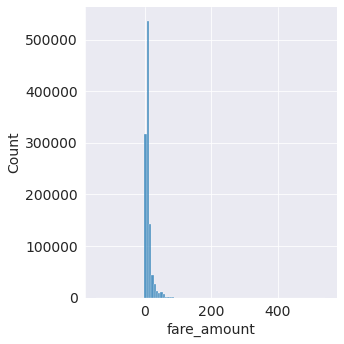

In [30]:
sns.displot(taxi_df['fare_amount'], kde=False, bins=100)

Fare_amount is negative in some rows and absurdly huge like $500 in some rows. I am removing these outliers.

In [31]:
taxi_df = taxi_df[(taxi_df['fare_amount']>0) & (taxi_df['fare_amount'] <= 200)]

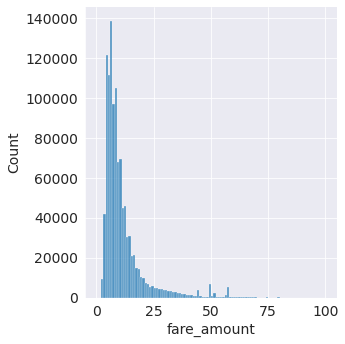

In [32]:
sns.displot(taxi_df[taxi_df['fare_amount']<=100]['fare_amount'], kde=False, bins=100)

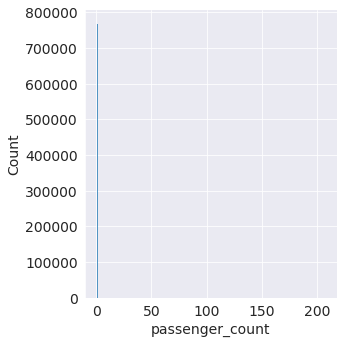

In [33]:
sns.displot(taxi_df['passenger_count'], kde=False)

In [34]:
sum(taxi_df['passenger_count']>10)

3

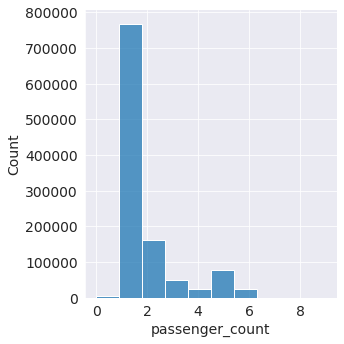

In [35]:
sns.displot(taxi_df[taxi_df['passenger_count']<=10].passenger_count, kde=False, bins=10)

In [36]:
sum(taxi_df['passenger_count']==0)

3881

<AxesSubplot:xlabel='passenger_count', ylabel='fare_amount'>

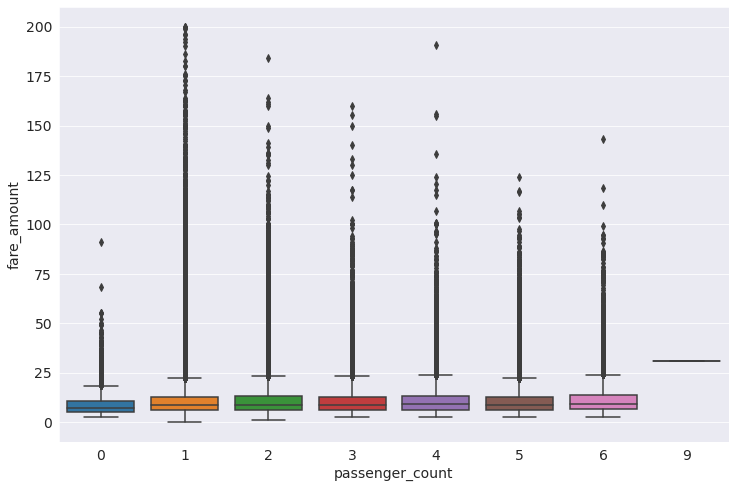

In [37]:
sns.boxplot(data=taxi_df[taxi_df['passenger_count']<=10], x="passenger_count", y="fare_amount")

In [38]:
taxi_df[taxi_df['passenger_count']>8]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
179131,30.83,2014-11-30 22:03:54+00:00,-73.863510,40.769806,-73.950584,40.770939,9
410501,3.30,2010-12-29 12:33:00+00:00,-73.937729,40.758579,-73.937714,40.758606,208
581090,7.10,2009-05-04 23:08:00+00:00,-73.937752,40.758377,-73.937828,40.758266,208
770185,3.30,2010-12-15 13:47:00+00:00,0.000000,0.000000,0.000000,0.000000,208


There are some rows in which passnger count is 0. So I am going to drop those rows. Although it is unlikely for taxi to have more than 5 passanger. Even if i consider some extereme scenario taxis can't carry more than 8 passangers. So Let's drop these data points.

In [39]:
taxi_df = taxi_df[(taxi_df['passenger_count']<=8) & (taxi_df['passenger_count']>0)]

Now because we have longitude and latitude. So We have plot these coordinate on a map to get a better view and see if there is some data to be cleaned.
First let's define the Bounding Box from data of test dataset. Bounding Box is the area defined by two longitudes and two latitudes that will include all spatial points.

In [40]:
bbox = (min(test_df.pickup_longitude.min(), test_df.dropoff_longitude.min()),
        max(test_df.pickup_longitude.max(), test_df.dropoff_longitude.max()),
        min(test_df.pickup_latitude.min(), test_df.dropoff_latitude.min()),
        max(test_df.pickup_latitude.max(), test_df.dropoff_latitude.max())
)
       
bbox

(-74.26324462890625,
 -72.98653411865234,
 40.568973541259766,
 41.709556579589844)

We can go to https://www.openstreetmap.org/export#map=5/51.500/-0.100 to get the desired map.
I have followed this medium article for getting the map and plotting pickup and dropoff location on that map. https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

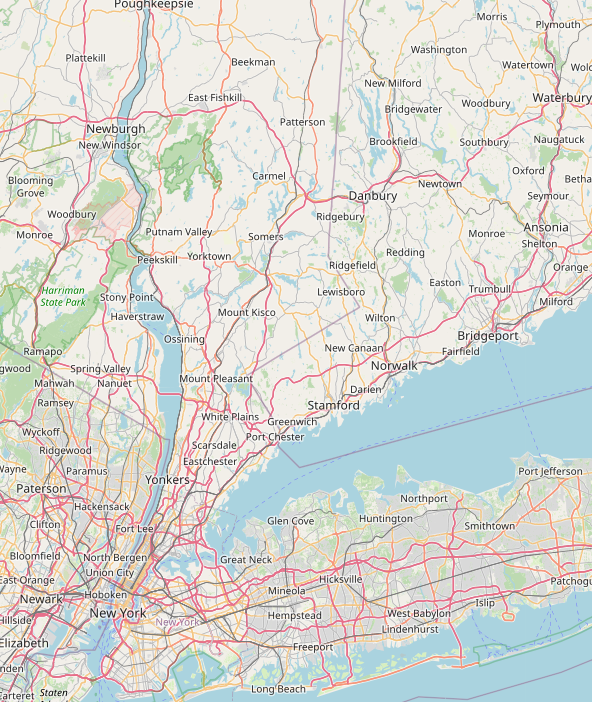

In [41]:
import PIL
import urllib
import io

url = 'https://i.imgur.com/xx2b9dC.png'
nyc_map = PIL.Image.open(urllib.request.urlopen(url))
nyc_map

In [42]:
nyc_map = np.array(nyc_map)

Because I do not have to predict fare for trips that are outside that bounding box and we already have enough large dataset. So let's drop data points outside of bounding box

In [43]:
taxi_df = taxi_df[(taxi_df.pickup_longitude >= bbox[0]) & (taxi_df.pickup_longitude <= bbox[1]) &
            (taxi_df.pickup_latitude >= bbox[2]) & (taxi_df.pickup_latitude <= bbox[3]) & 
            (taxi_df.dropoff_longitude >= bbox[0]) & (taxi_df.dropoff_longitude <= bbox[1]) & 
            (taxi_df.dropoff_latitude >= bbox[2]) & (taxi_df.dropoff_latitude <= bbox[3])]

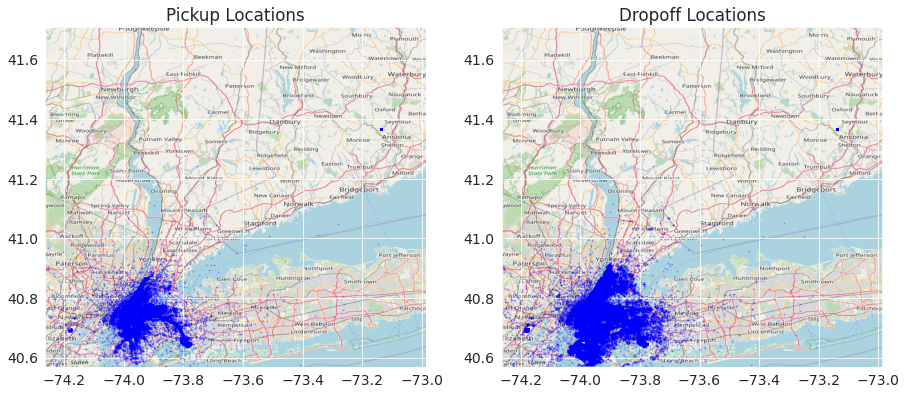

In [44]:
fig, ax = plt.subplots(1, 2, figsize = (15,9))
ax[0].scatter(taxi_df['pickup_longitude'], taxi_df['pickup_latitude'], zorder=1, alpha= 0.2, c='b', s=1)
ax[0].set_title('Pickup Locations')
ax[0].set_xlim(bbox[0],bbox[1])
ax[0].set_ylim(bbox[2],bbox[3])
ax[0].imshow(nyc_map, zorder=0, extent = bbox, aspect= 'equal')

ax[1].scatter(taxi_df['dropoff_longitude'], taxi_df['dropoff_latitude'], zorder=1, alpha= 0.2, c='b', s=1)
ax[1].set_title('Dropoff Locations')
ax[1].set_xlim(bbox[0],bbox[1])
ax[1].set_ylim(bbox[2],bbox[3])
ax[1].imshow(nyc_map, zorder=0, extent = bbox, aspect= 'equal')

plt.imshow(nyc_map)

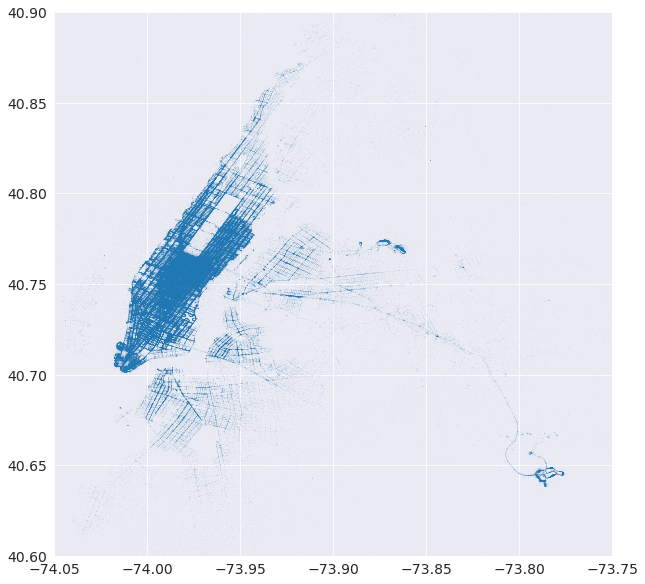

In [45]:
longitude = list(taxi_df.pickup_longitude) + list(taxi_df.dropoff_longitude)
latitude = list(taxi_df.pickup_latitude) + list(taxi_df.dropoff_latitude)
plt.figure(figsize = (10,10))
plt.plot(longitude,latitude,'.', alpha = 0.4, markersize = 0.05)
plt.xlim(-74.05, -73.75)
plt.ylim(40.6, 40.9)
plt.show()

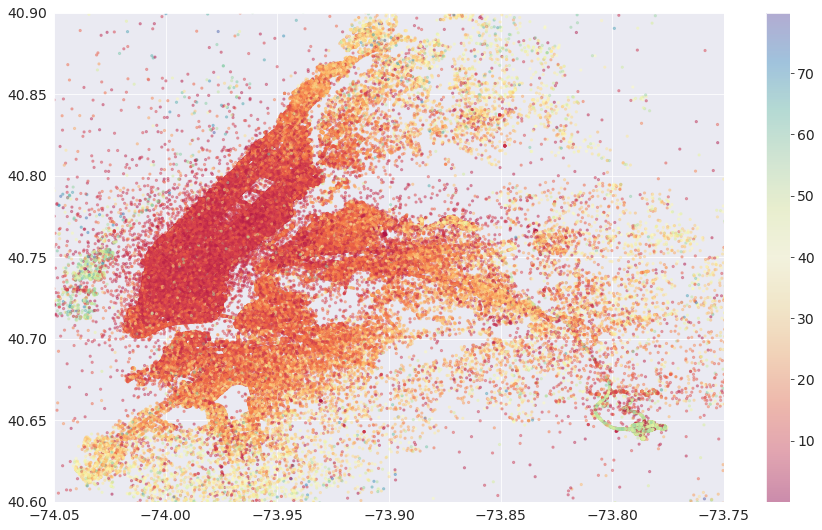

In [46]:
fig, ax = plt.subplots(1, 1, figsize = (15,9))
xdf = taxi_df[taxi_df['fare_amount']<80]

sp = ax.scatter(xdf.dropoff_longitude, xdf.dropoff_latitude, c=xdf.fare_amount,alpha= 0.4, s=5, cmap='Spectral')
fig.colorbar(sp)
ax.set_xlim(-74.05, -73.75)
ax.set_ylim(40.6, 40.9)
plt.show()

Places that are far away has higher taxi fare. Makes sense

It can be seen from previous plots that some location points are in the water. Let's try to remove them using a mask image of map in which land is shown in black and water in white. I've taken help from this notebook for that. https://www.kaggle.com/breemen/nyc-taxi-fare-data-exploration

In [47]:
url = 'https://i.imgur.com/ZGg3Bry.png'
nyc_mask = np.array(PIL.Image.open(urllib.request.urlopen(url)))[:,:,0]>(255*0.7)

In [48]:
nyc_mask.shape

(702, 592)

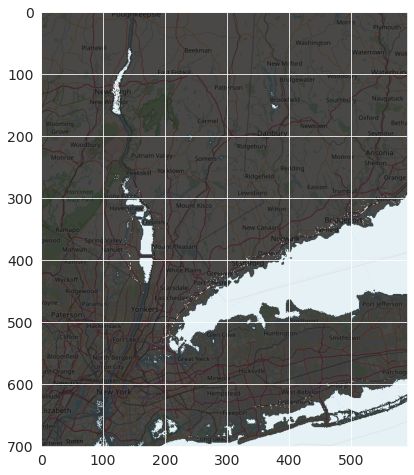

In [49]:
plt.imshow(nyc_map, zorder=0)
plt.imshow(nyc_mask, alpha=0.7, cmap='gray')

In [50]:
def location_to_coor(longitude, latitude, dx, dy, bbox):
    return (dx*(longitude - bbox[0])/(bbox[1]-bbox[0])).astype('int'), (dy - dy*(latitude - bbox[2])/(bbox[3]-bbox[2])).astype('int')

In [51]:
pickup_x, pickup_y = location_to_coor(taxi_df.pickup_longitude, taxi_df.pickup_latitude, 
                                  nyc_mask.shape[1], nyc_mask.shape[0], bbox)
dropoff_x, dropoff_y = location_to_coor(taxi_df.dropoff_longitude, taxi_df.dropoff_latitude, 
                                  nyc_mask.shape[1], nyc_mask.shape[0], bbox)

In [52]:
idx = (nyc_mask[pickup_y, pickup_x] & nyc_mask[dropoff_y, dropoff_x])
print("Number of trips in water: {}".format(np.sum(idx)))

Number of trips in water: 36


In [53]:
np.count_nonzero(idx==0)

1081445

In [54]:
taxi_df[idx]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
66846,6.100000,2010-08-15 23:05:00+00:00,-73.407204,40.574799,-73.427063,40.575588,1
109912,11.000000,2013-03-15 20:21:19+00:00,-73.806183,40.616241,-73.806183,40.616241,2
141426,11.300000,2010-11-06 19:09:00+00:00,-73.748360,40.875668,-73.717438,40.900795,4
145475,26.500000,2013-07-01 12:46:19+00:00,-73.845825,40.839092,-73.845825,40.839092,1
177043,8.500000,2011-09-03 00:00:00+00:00,-73.776817,40.575539,-73.812759,40.576694,1
184054,6.100000,2011-12-31 17:01:00+00:00,-73.796921,40.835251,-73.804588,40.834156,5
272800,8.900000,2009-11-29 22:06:00+00:00,-74.068161,40.682102,-74.068161,40.682102,1
318139,9.700000,2009-04-23 10:28:27+00:00,-73.722336,40.572575,-73.724792,40.572109,1
328099,4.500000,2011-04-13 16:19:00+00:00,-73.810997,40.841358,-73.810738,40.837276,5
330638,7.700000,2009-08-02 18:52:36+00:00,-73.597633,40.976704,-73.596153,40.976833,3


These all coordinates lies on water. I've checked two of then using <a href="https://www.google.com/maps/place/41%C2%B002'57.1%22N+73%C2%B016'51.6%22W/@40.9199231,-73.5469829,8.24z/data=!4m5!3m4!1s0x0:0x4004ca2e07ed014b!8m2!3d41.049183!4d-73.281006">Google Maps</a>.
Let's drop these data points

In [55]:
taxi_df = taxi_df[~idx]

### Extract Parts of Date

- Year
- Month
- Day
- Weekday
- Hour

In [56]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [57]:
add_dateparts(taxi_df, 'pickup_datetime')

In [58]:
add_dateparts(test_df, 'pickup_datetime')

In [59]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1,2011,10,8,5,11
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1,2012,12,1,5,21
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1,2012,12,1,5,21
...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6,2015,5,10,6,12
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6,2015,1,12,0,17
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6,2015,4,19,6,20
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6,2015,1,31,5,1


### Add Distance Between Pickup and Drop

I have calculated the haversine distance: 
- https://en.wikipedia.org/wiki/Haversine_formula
- https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas

In [60]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [61]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

In [62]:
%%time
add_trip_distance(taxi_df)
add_trip_distance(test_df)

CPU times: user 144 ms, sys: 18 ms, total: 162 ms
Wall time: 106 ms


In [63]:
taxi_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
count,1.08144e+06,1.08144e+06,1.08144e+06,1.08144e+06,1.08144e+06,1.08144e+06,1.08144e+06,1.08144e+06,1.08144e+06,1.08144e+06,1.08144e+06,1.08144e+06
mean,11.3085,-73.0678,40.3352,-73.0661,40.3355,1.69062,2011.74,6.27048,15.7128,3.04296,13.5075,3.32561
std,9.54424,0.908079,0.416961,0.908826,0.417247,1.30684,1.86613,3.43722,8.68366,1.94846,6.51317,3.76907
min,0.01,-74.2607,40.5693,-74.2614,40.569,1,2009,1,1,0,0,0
25%,6,-73.9923,40.7366,-73.9916,40.7356,1,2010,3,8,1,9,1.25498
50%,8.5,-73.9821,40.7534,-73.9806,40.7539,1,2012,6,16,3,14,2.15407
75%,12.5,-73.9683,40.7676,-73.9654,40.7684,2,2013,9,23,5,19,3.91106
max,200,-73.1242,41.6724,-73.1242,41.6448,6,2015,12,31,6,23,115.06


In [64]:
taxi_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
0,9.3,2012-05-04 06:11:20+00:00,-73.989258,40.690834,-74.004135,40.725689,1,2012,5,4,4,6,4.070878
1,16.5,2014-12-08 16:00:01+00:00,-73.982803,40.745289,-74.014252,40.702934,1,2014,12,8,0,16,5.400516
2,9.7,2010-11-08 20:42:00+00:00,-73.970703,40.761642,-73.992836,40.727646,2,2010,11,8,0,20,4.212385
3,5.5,2013-01-05 21:36:00+00:00,-73.989693,40.735497,-73.982010,40.739391,1,2013,1,5,5,21,0.778313
4,7.3,2011-02-27 14:45:00+00:00,-73.983757,40.746429,-73.963554,40.774090,1,2011,2,27,6,14,3.512682
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108944,15.7,2009-02-14 20:55:41+00:00,-73.936462,40.853058,-73.972488,40.791531,1,2009,2,14,5,20,7.478479
1108945,14.0,2013-10-04 23:46:00+00:00,-73.992722,40.716663,-73.982353,40.691486,6,2013,10,4,4,23,2.930871
1108946,6.0,2014-08-18 09:02:20+00:00,-73.950432,40.775360,-73.955780,40.764072,2,2014,8,18,0,9,1.332569
1108947,5.5,2012-10-19 09:25:00+00:00,-73.958313,40.773880,-73.960106,40.766159,3,2012,10,19,4,9,0.871172


<AxesSubplot:xlabel='pickup_datetime_day', ylabel='fare_amount'>

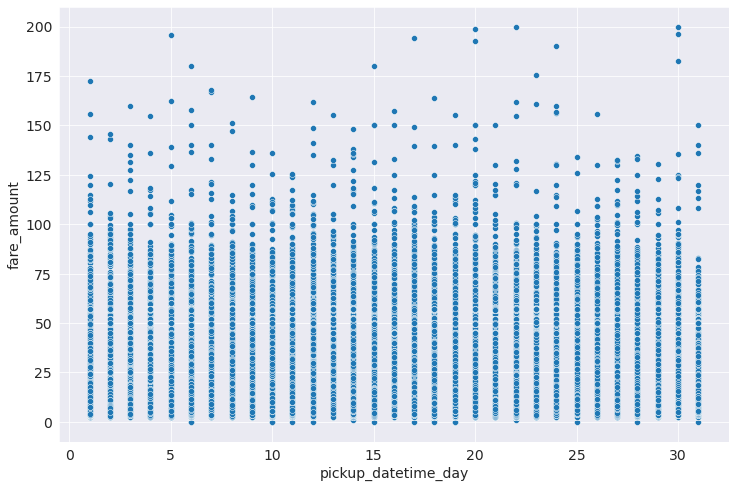

In [65]:
sns.scatterplot(data = taxi_df, x="pickup_datetime_day", y="fare_amount")

Throught days of a month fare seems to be uniformly distributed

<AxesSubplot:xlabel='pickup_datetime_year', ylabel='fare_amount'>

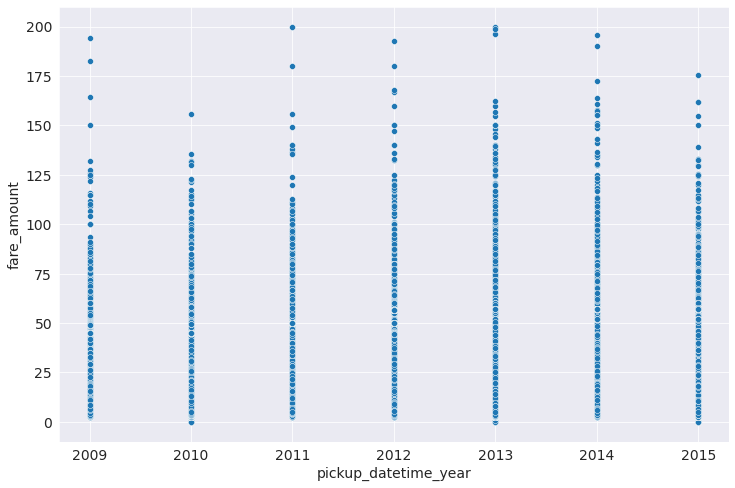

In [66]:
sns.scatterplot(data = taxi_df, x="pickup_datetime_year", y="fare_amount")

In [67]:
taxi_df.groupby('pickup_datetime_year').mean()['fare_amount']

pickup_datetime_year
2009    10.063385
2010    10.114882
2011    10.427426
2012    11.149716
2013    12.561121
2014    12.860466
2015    12.941254
Name: fare_amount, dtype: float32

Fare amount seems to steadily increasing by year as expected

<AxesSubplot:xlabel='pickup_datetime_weekday', ylabel='fare_amount'>

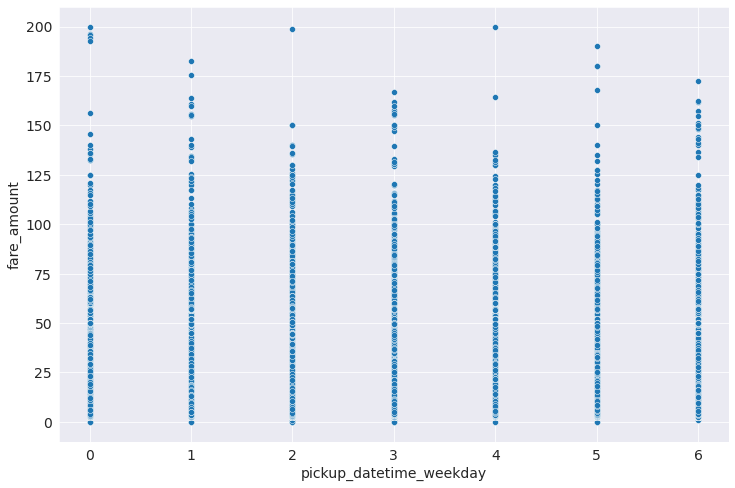

In [68]:
sns.scatterplot(data = taxi_df, x="pickup_datetime_weekday", y="fare_amount")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

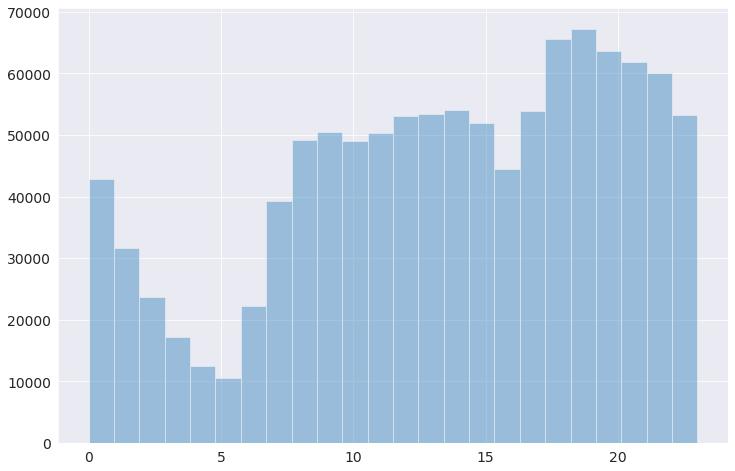

In [69]:
sns.distplot(x=taxi_df['pickup_datetime_hour'], bins=24, kde=False)

No. of trips are lowest from midnight to 5 am and highest in evening when there are people returning from their workplaces. Nothing unexpected. Time of the day also plays an important role.

<AxesSubplot:xlabel='pickup_datetime_hour', ylabel='fare_amount'>

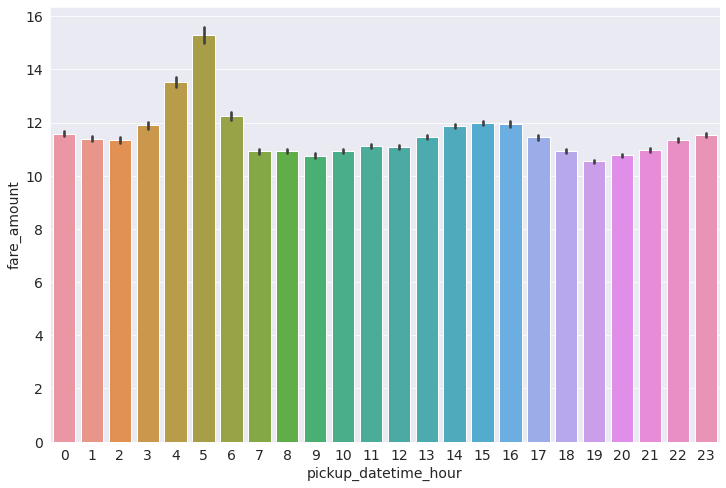

In [70]:
sns.barplot(x='pickup_datetime_hour',y='fare_amount', data=taxi_df)

<AxesSubplot:xlabel='pickup_datetime_hour', ylabel='trip_distance'>

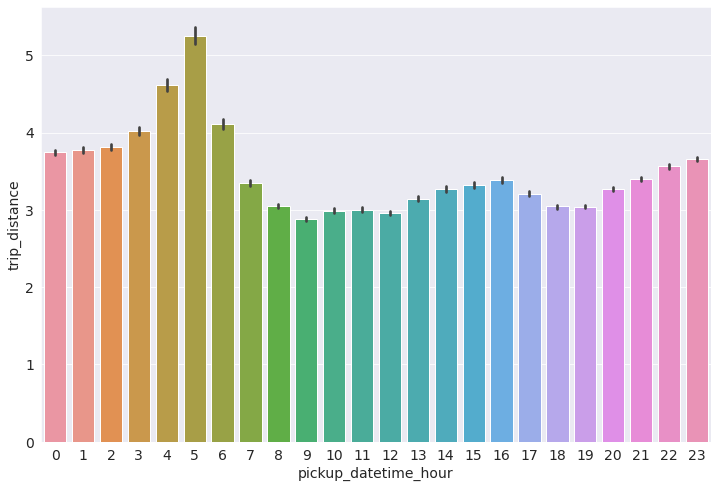

In [71]:
sns.barplot(x='pickup_datetime_hour',y='trip_distance', data=taxi_df)

Fare is higher b/w 3-6 am and 2-4 pm . It maybe possible that people living far away from their workplaces prefer to leave early to avoid rush hour

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

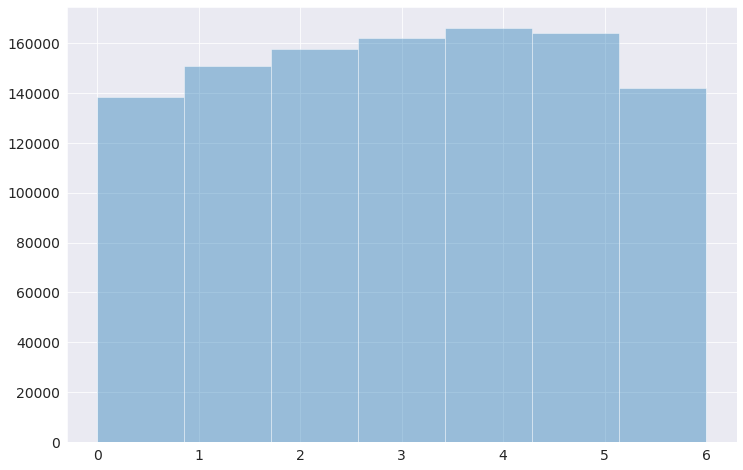

In [72]:
sns.distplot(x=taxi_df['pickup_datetime_weekday'], bins=7, kde=False)

trips are uniformly devided throught all days of week.

<AxesSubplot:xlabel='pickup_datetime_weekday', ylabel='fare_amount'>

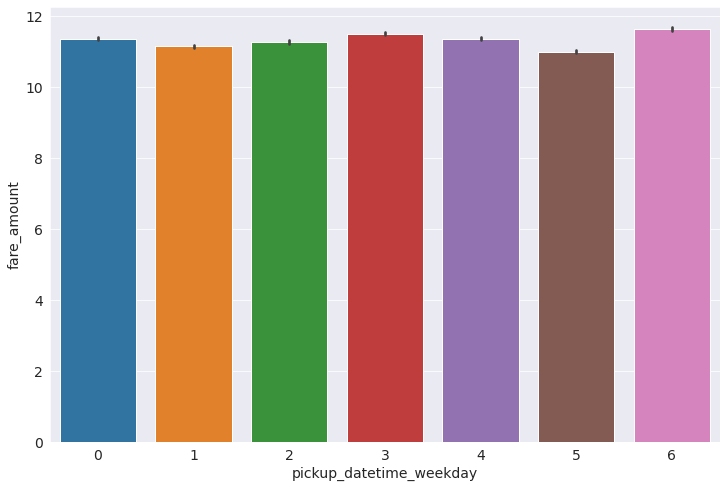

In [73]:
sns.barplot(x='pickup_datetime_weekday',y='fare_amount', data=taxi_df)

There seems to slight increase avg fare amount on sunday. Maybe people are going for weekend travel. Or maybe I am overthinking it??

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_distance', ylabel='Density'>

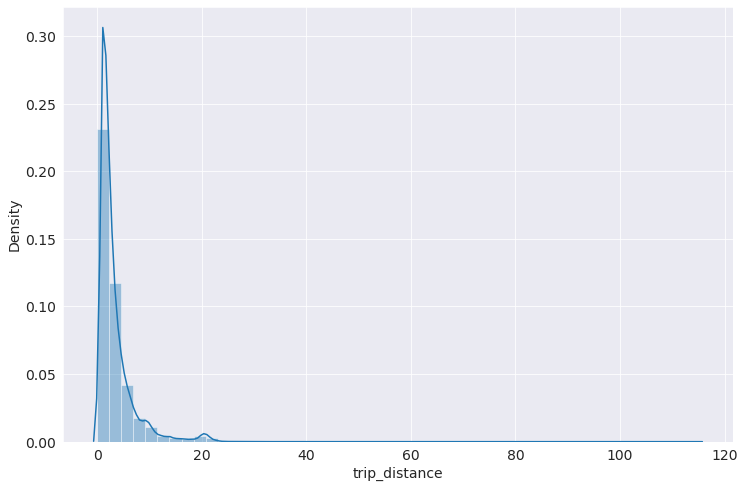

In [74]:
sns.distplot(taxi_df['trip_distance'])

In [75]:
taxi_df[taxi_df['trip_distance']>100]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
14458,35.299999,2010-04-13 14:36:23+00:00,-73.137390,41.366138,-73.977699,40.675381,1,2010,4,13,1,14,104.189218
33045,14.900000,2009-02-07 02:14:12+00:00,-73.985214,40.724209,-73.137390,41.366138,1,2009,2,7,5,2,100.684541
80038,12.900000,2009-09-11 19:43:24+00:00,-74.008476,40.720333,-73.137390,41.366138,1,2009,9,11,4,19,102.372401
87343,39.470001,2009-10-26 21:14:58+00:00,-73.137390,41.366138,-74.010559,40.706268,1,2009,10,26,0,21,103.602697
101415,10.100000,2009-11-26 02:40:10+00:00,-73.137390,41.366138,-74.008118,40.707092,1,2009,11,26,3,2,103.393295
167868,12.100000,2009-06-14 18:36:56+00:00,-73.137390,41.366138,-73.996864,40.716496,2,2009,6,14,6,18,101.983418
176056,8.900000,2010-05-19 17:13:22+00:00,-73.987534,40.671650,-73.137390,41.366138,2,2010,5,19,2,17,105.054249
186312,19.700001,2009-05-05 08:09:49+00:00,-73.988884,40.692600,-73.137390,41.366138,1,2009,5,5,1,8,103.426381
410742,35.700001,2009-06-30 17:03:09+00:00,-73.137390,41.366138,-73.973984,40.688816,1,2009,6,30,1,17,102.876769
413999,7.700000,2009-12-16 19:25:20+00:00,-73.137390,41.366138,-73.989807,40.729534,1,2009,12,16,2,19,100.536886


### Add Distance From Popular Landmarks

- JFK Airport
- LGA Airport
- EWR Airport
- Times Square
- Met Meuseum
- World Trade Center

We'll add the distance from drop location. 

In [76]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [77]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [78]:
%%time
for a_df in [taxi_df, test_df]:
    for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        add_landmark_dropoff_distance(a_df, name, lonlat)

CPU times: user 691 ms, sys: 98 ms, total: 789 ms
Wall time: 508 ms


In [79]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.321899,20.574911,9.760167,17.346842,4.239343,4.218709
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.423777,21.550976,11.315990,15.789623,5.382879,3.098136
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1,2011,10,8,5,11,0.618015,20.594069,9.526829,17.576965,3.946721,4.514503
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1,2012,12,1,5,21,1.959681,21.689365,10.195091,16.969650,3.843892,4.637048
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1,2012,12,1,5,21,5.383829,21.113993,10.295857,16.808367,4.433764,3.967223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6,2015,5,10,6,12,2.123265,21.507181,6.880905,21.015013,0.645683,8.809922
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6,2015,1,12,0,17,3.269084,21.462183,7.254931,20.464457,0.420341,8.229158
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6,2015,4,19,6,20,19.171534,1.169105,16.084494,32.772369,20.734238,19.933737
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6,2015,1,31,5,1,8.338154,22.402418,6.138518,23.410772,3.200790,11.556184


## 3. Prepare Dataset for Training

- Split Training & Validation Set
- Fill/Remove Missing Values
- Extract Inputs & Outputs
   - Training
   - Validation
   - Test

### Split Training & Validation Set

Time range for test set is also 2009-2015. So I'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data. 

Since the test set and training set have the same date ranges, pick a random 20% fraction.


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
train_df, val_df = train_test_split(taxi_df, test_size=0.2, random_state=10)

In [82]:
len(train_df), len(val_df)

(865156, 216289)

### Extract Inputs and Outputs

In [83]:
taxi_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance'],
      dtype='object')

In [84]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']

In [85]:
target_col = 'fare_amount'

#### Training

In [86]:
train_inputs = train_df[input_cols]

In [87]:
train_targets = train_df[target_col]

In [88]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
298516,-73.975533,40.752472,-73.973015,40.760647,1,2011,8,8,0,14,0.932971,21.107498,8.526378,18.720020,2.241632,6.176906
1020175,-73.945374,40.786606,-73.979286,40.762672,2,2010,2,28,6,9,3.901368,21.660656,9.000974,18.340656,2.299776,6.132190
334226,-73.961365,40.772060,-73.970322,40.759510,4,2013,11,28,3,12,1.585272,20.851875,8.333636,18.873382,2.290174,6.187070
53996,-73.981544,40.780769,-73.983490,40.778461,1,2009,12,26,5,20,0.304057,23.057524,9.215069,18.879333,1.710444,7.649322
155120,-73.962212,40.763306,-74.007553,40.740982,5,2013,11,23,5,19,4.552101,22.281889,11.929027,15.181027,5.671189,3.160164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728956,-73.972702,40.758522,-73.981094,40.773521,1,2015,6,9,1,11,1.810103,22.545188,9.019846,18.773051,1.641215,7.191253
984933,-74.015877,40.715271,-73.992218,40.724991,5,2014,9,22,0,17,2.266565,20.299209,11.502971,15.853543,6.521204,2.028138
824707,-73.987785,40.770515,-74.006821,40.748718,1,2012,1,22,6,13,2.904336,22.668135,11.609693,15.580418,5.010471,4.021911
633550,-74.002907,40.733307,-73.951439,40.712608,5,2011,2,19,5,3,4.906696,16.619513,9.672121,18.966521,7.487822,4.924050


In [89]:
train_targets

298516      5.7
1020175    10.5
334226      5.5
53996       2.9
155120     17.5
           ... 
728956     11.5
984933     10.5
824707      7.3
633550     12.1
1075197    14.0
Name: fare_amount, Length: 865156, dtype: float32

#### Validation

In [90]:
val_inputs = val_df[input_cols]

In [91]:
val_targets = val_df[target_col]

In [92]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
733263,-74.004105,40.725147,-73.994133,40.741844,1,2011,5,7,5,11,2.036558,21.357860,10.836190,16.267588,4.918989,3.510491
273476,-73.981369,40.750019,-73.951950,40.786312,1,2014,10,25,5,0,4.732598,21.773709,6.641666,21.607475,1.219129,9.533976
746913,-74.005257,40.736153,-73.997169,40.719376,2,2012,2,11,5,18,1.984979,20.398632,12.181371,15.303116,7.257488,1.310143
937534,-73.995438,40.739231,-73.983582,40.764515,1,2014,6,28,5,16,2.981866,22.070925,9.323996,18.110791,2.382601,6.180195
494963,-73.989372,40.756680,-73.978958,40.762062,3,2014,3,12,2,23,1.060846,21.596837,8.986071,18.335501,2.339275,6.082396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036001,-73.992203,40.742615,-73.975761,40.735760,1,2014,2,13,3,18,1.579953,19.687428,9.709711,17.511440,4.963426,3.858585
240463,-73.978462,40.728779,-73.986839,40.722523,1,2011,3,7,0,21,0.990294,19.770847,11.258107,16.229210,6.626198,2.233780
350550,-73.965530,40.762970,-73.954086,40.775509,3,2015,3,6,4,20,1.694138,21.028334,6.741029,20.876750,0.880518,8.423347
835819,-73.977043,40.749168,-73.991753,40.754036,1,2014,12,18,3,10,1.351431,21.930754,10.231246,16.979711,3.704103,4.851358


In [93]:
val_targets

733263      5.3
273476     12.5
746913      6.9
937534     12.0
494963      5.5
           ... 
1036001     6.0
240463      4.5
350550      5.5
835819     10.5
656124      3.0
Name: fare_amount, Length: 216289, dtype: float32

#### Test

In [94]:
test_inputs = test_df[input_cols]

In [95]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.321899,20.574911,9.760167,17.346842,4.239343,4.218709
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.423777,21.550976,11.315990,15.789623,5.382879,3.098136
2,-73.982521,40.751259,-73.979652,40.746140,1,2011,10,8,5,11,0.618015,20.594069,9.526829,17.576965,3.946721,4.514503
3,-73.981163,40.767807,-73.990448,40.751637,1,2012,12,1,5,21,1.959681,21.689365,10.195091,16.969650,3.843892,4.637048
4,-73.966049,40.789776,-73.988564,40.744427,1,2012,12,1,5,21,5.383829,21.113993,10.295857,16.808367,4.433764,3.967223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6,2015,5,10,6,12,2.123265,21.507181,6.880905,21.015013,0.645683,8.809922
9910,-73.945511,40.803600,-73.960213,40.776371,6,2015,1,12,0,17,3.269084,21.462183,7.254931,20.464457,0.420341,8.229158
9911,-73.991600,40.726608,-73.789742,40.647011,6,2015,4,19,6,20,19.171534,1.169105,16.084494,32.772369,20.734238,19.933737
9912,-73.985573,40.735432,-73.939178,40.801731,6,2015,1,31,5,1,8.338154,22.402418,6.138518,23.410772,3.200790,11.556184


### Scaling and One-Hot Encoding

I am not going to do this because I'll be training tree-based models which are generally able to do a good job even without the above.

### Save Intermediate DataFrames

Let's save the processed datasets in the Apache Parquet format, so that I will be able to download them easily and continue model training on my lacal machine.

They can also be used to create seperate notebook for training and evaluating models after EDA, feature engineering.

In [96]:
train_df.to_parquet('train.parquet')

In [97]:
val_df.to_parquet('val.parquet')

In [98]:
test_df.to_parquet('test.parquet')

## 7. Train & Evaluate Different Models

I will train each of the following & submit predictions to Kaggle:

- Gradient Boosting
- LightGBM
- ANN

Can also train Linear Regression, Random Forests for prediction

In [99]:
train_df = pd.read_parquet('test.parquet', engine='pyarrow')
val_df = pd.read_parquet('test.parquet', engine='pyarrow')
test_df = pd.read_parquet('test.parquet', engine='pyarrow')

Let's define a helper function to evaluate models and generate test predictions

In [100]:
from sklearn.metrics import mean_squared_error
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse, train_preds, val_preds

In [101]:
def predict_and_submit(model, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

## Gradient Boosting

### 1. XGBoost

https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [102]:
from xgboost import XGBRegressor

In [103]:
xgb_model_final = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42,
                               n_estimators=500, max_depth=5, learning_rate=0.1, 
                               subsample=0.8, colsample_bytree=0.8, tree_method= 'gpu_hist')

In [104]:
%%time
xgb_model_final.fit(train_inputs, train_targets)

CPU times: user 3.3 s, sys: 384 ms, total: 3.68 s
Wall time: 4.64 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [105]:
evaluate(xgb_model_final)

(3.2735302,
 3.4916072,
 array([ 5.691152 , 10.264033 ,  8.8191395, ...,  8.534147 , 14.141892 ,
        12.138166 ], dtype=float32),
 array([ 7.0482993, 12.938797 ,  8.313852 , ...,  6.8898826,  9.127134 ,
         4.337887 ], dtype=float32))

This model is giving fairly better predictions than the base xgb model. Let's also plot the graph to see the importance of features in pridictions.

In [106]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': xgb_model_final.feature_importances_
}).sort_values('importance', ascending=False)

In [107]:
def plot_importance(importance_df):
    plt.figure(figsize=(10,6))
    plt.title('Feature Importance')
    sns.barplot(data=importance_df.head(10), x='importance', y='feature')

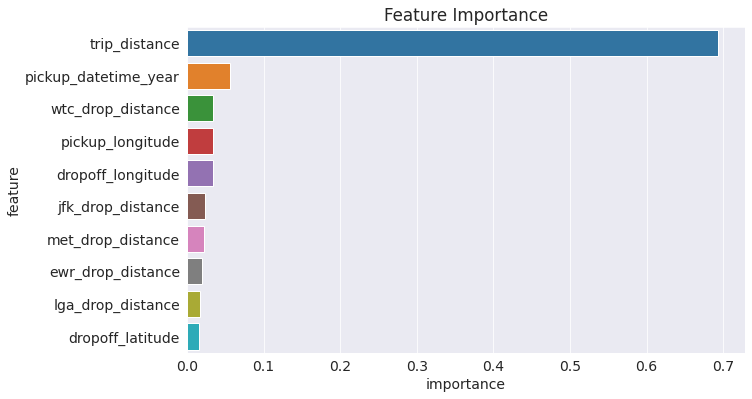

In [108]:
plot_importance(importance_df)

In [109]:
predict_and_submit(xgb_model_final, 'xgb_tuned_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.770588
1,2015-01-27 13:08:24.0000003,11.162046
2,2011-10-08 11:53:44.0000002,5.141867
3,2012-12-01 21:12:12.0000002,8.848608
4,2012-12-01 21:12:12.0000003,16.094183
...,...,...
9909,2015-05-10 12:37:51.0000002,8.729294
9910,2015-01-12 17:05:51.0000001,12.268613
9911,2015-04-19 20:44:15.0000001,54.304195
9912,2015-01-31 01:05:19.0000005,19.604233


### 2. Light GBM

https://lightgbm.readthedocs.io/en/latest/Python-Intro.html

In [110]:
import lightgbm as lgb

In [111]:
dtrain = lgb.Dataset(train_inputs, label = train_targets, silent=True, free_raw_data=False)
dval  = lgb.Dataset(val_inputs, label = val_targets, silent=True, free_raw_data=False)

In [112]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'nthread': -1,
        'verbose': -1,
        'metric': 'rmse',
    }

In [113]:
lgbm_base_model = lgb.train(params, train_set = dtrain, valid_sets = [dval])

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's rmse: 8.77577
[2]	valid_0's rmse: 8.11067
[3]	valid_0's rmse: 7.52445
[4]	valid_0's rmse: 7.0072
[5]	valid_0's rmse: 6.55786
[6]	valid_0's rmse: 6.16509
[7]	valid_0's rmse: 5.82649
[8]	valid_0's rmse: 5.53217
[9]	valid_0's rmse: 5.28265
[10]	valid_0's rmse: 5.06608
[11]	valid_0's rmse: 4.87872
[12]	valid_0's rmse: 4.7232
[13]	valid_0's rmse: 4.58746
[14]	valid_0's rmse: 4.47619
[15]	valid_0's rmse: 4.37816
[16]	valid_0's rmse: 4.2935
[17]	valid_0's rmse: 4.22269
[18]	valid_0's rmse: 4.15859
[19]	valid_0's rmse: 4.10509
[20]	valid_0's rmse: 4.05707
[21]	valid_0's rmse: 4.01771
[22]	valid_0's rmse: 3.98099
[23]	valid_0's rmse: 3.95251
[24]	valid_0's rmse: 3.92351
[25]	valid_0's rmse: 3.90192
[26]	valid_0's rmse: 3.88226
[27]	valid_0's rmse: 3.8614
[28]	valid_0's rmse: 3.84494
[29]	valid_0's rmse: 3.83005
[30]	valid_0's rmse: 3.81623
[31]	valid_0's rmse: 3.80479
[32]	valid_0's rmse: 3.79608
[33]	valid_0's rmse: 3.78554
[34]	valid_0's rmse: 3.77703
[35]	valid_0's rmse: 3.7682

In [114]:
evaluate(lgbm_base_model)

(3.5327680035630444,
 3.574104235354853,
 array([ 5.542001  , 10.23804612,  9.26929288, ...,  8.91275173,
        14.33635165, 11.27981951]),
 array([ 7.25881782, 13.38107552,  7.82512947, ...,  7.27915265,
         8.98697909,  4.68896343]))

Tuning Hyperparameters for LGBM

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html

https://towardsdatascience.com/kagglers-guide-to-lightgbm-hyperparameter-tuning-with-optuna-in-2021-ed048d9838b5

I'm using optuna for hyperparameter tuning. This is the first time i am using this in an kaggle competition.

In [115]:
import optuna

In [116]:
from optuna.integration import LightGBMPruningCallback


def objective(trial):
    
    param_grid = {
        "objective": trial.suggest_categorical("objective", ["regression"]),
        'metric': trial.suggest_categorical("metric", ['rmse']),
        "boosting_type": trial.suggest_categorical("boosting_type", ['gbdt']),
        "verbose" :trial.suggest_categorical("verbose", [-1]),
        "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "num_boost_round": trial.suggest_categorical("num_boost_round", [1000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.9, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.9, step=0.1
        ),
    }

    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, 'rmse')


    model = lgb.train(param_grid , dtrain,
        valid_sets = [dval],
        early_stopping_rounds=100,
        callbacks=[pruning_callback]
    )
    
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)


    return val_rmse


In [117]:
study = optuna.create_study(direction="minimize", study_name="LGBM Regressor")
func = lambda trial: objective(trial)
study.optimize(func, n_trials=25)

[I 2022-01-03 09:08:29,723] A new study created in memory with name: LGBM Regressor
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-01-03 09:10:03,576] Trial 0 finished with value: 3.7901514971326415 and parameters: {'objective': 'regression', 'metric': 'rmse', 'boosting_type': 'gbdt', 'verbose': -1, 'device_type': 'gpu', 'num_boost_round': 1000, 'learning_rate': 0.0961539352865946, 'num_leaves': 1460, 'max_depth': 6, 'min_data_in_leaf': 3900, 'lambda_l1

In [118]:
print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Best value (rmse): 3.55896
	Best params:
		objective: regression
		metric: rmse
		boosting_type: gbdt
		verbose: -1
		device_type: gpu
		num_boost_round: 1000
		learning_rate: 0.1792955031424042
		num_leaves: 1460
		max_depth: 7
		min_data_in_leaf: 4700
		lambda_l1: 90
		lambda_l2: 70
		min_gain_to_split: 1.7104954661906102
		bagging_fraction: 0.9
		bagging_freq: 1
		feature_fraction: 0.9


In [119]:
lgbm_final_model = lgb.train(study.best_params, train_set = dtrain, valid_sets = [dval], early_stopping_rounds=100)

[1]	valid_0's rmse: 8.26204
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 7.24202
[3]	valid_0's rmse: 6.45611
[4]	valid_0's rmse: 5.85505
[5]	valid_0's rmse: 5.4033
[6]	valid_0's rmse: 5.06676
[7]	valid_0's rmse: 4.81559
[8]	valid_0's rmse: 4.63531
[9]	valid_0's rmse: 4.49819
[10]	valid_0's rmse: 4.39601
[11]	valid_0's rmse: 4.31639
[12]	valid_0's rmse: 4.25668
[13]	valid_0's rmse: 4.20423
[14]	valid_0's rmse: 4.16864
[15]	valid_0's rmse: 4.13505
[16]	valid_0's rmse: 4.10801
[17]	valid_0's rmse: 4.08807
[18]	valid_0's rmse: 4.06946
[19]	valid_0's rmse: 4.05377
[20]	valid_0's rmse: 4.04504
[21]	valid_0's rmse: 4.03456
[22]	valid_0's rmse: 4.02416
[23]	valid_0's rmse: 4.01598
[24]	valid_0's rmse: 4.01072
[25]	valid_0's rmse: 4.00504
[26]	valid_0's rmse: 3.99822
[27]	valid_0's rmse: 3.9884
[28]	valid_0's rmse: 3.98413
[29]	valid_0's rmse: 3.97885
[30]	valid_0's rmse: 3.97575
[31]	valid_0's rmse: 3.97131
[32]	valid_0's rmse: 3.96633
[33]	valid_0's rmse: 

In [120]:
evaluate(lgbm_final_model)

(3.5703612943289937,
 3.558966944646959,
 array([ 5.83011549, 10.08934968,  9.02028868, ...,  8.08848048,
        13.89013568, 12.49463664]),
 array([ 6.98220177, 13.12129883,  8.41312016, ...,  6.3283394 ,
         9.37196435,  4.65042657]))

In [121]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': lgbm_final_model.feature_importance()
}).sort_values('importance', ascending=False)

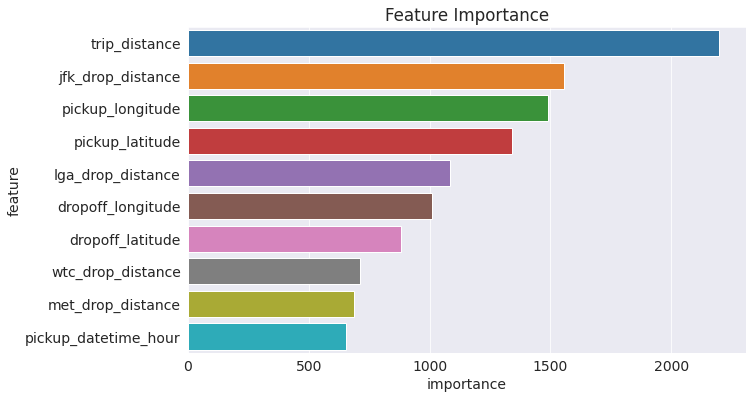

In [122]:
plot_importance(importance_df)

In [123]:
predict_and_submit(lgbm_final_model, 'lgbm_tuned_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.702142
1,2015-01-27 13:08:24.0000003,11.417638
2,2011-10-08 11:53:44.0000002,4.976629
3,2012-12-01 21:12:12.0000002,9.139924
4,2012-12-01 21:12:12.0000003,16.445313
...,...,...
9909,2015-05-10 12:37:51.0000002,9.305714
9910,2015-01-12 17:05:51.0000001,12.447413
9911,2015-04-19 20:44:15.0000001,55.172945
9912,2015-01-31 01:05:19.0000005,19.613327


## ANN

Finally, I'm training a neural network for this regression task. I will be using using a neural network of 4 hidden layers.

https://www.tensorflow.org/tutorials/keras/regression

https://keras.io/guides/sequential_model/

In [124]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [125]:
train_inputs.shape[1]

16

In [126]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_scalin = scaler.fit_transform(train_inputs)
val_scalin = scaler.transform(val_inputs)
test_scalin = scaler.transform(test_inputs)

In [127]:
len(test_scalin)

9914

In [128]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [129]:
# define a deep neural network model
def build_and_compile_model(dim):
    model = keras.Sequential([

      layers.Dense(128, activation='relu', input_dim=dim),
      layers.BatchNormalization(),

      layers.Dense(64, activation='relu'),
      layers.BatchNormalization(),

      layers.Dense(32, activation='relu'),
      layers.BatchNormalization(),

      layers.Dense(8, activation='relu'),
      layers.BatchNormalization(),

      layers.Dense(1)
    ])

    model.compile(loss=root_mean_squared_error,
                optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mae'])
    return model


In [130]:
dnn_model = build_and_compile_model(dim=train_inputs.shape[1])
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2176      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 2

2022-01-03 09:22:08.507659: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-03 09:22:08.508824: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-03 09:22:08.509503: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-03 09:22:08.510411: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [131]:
ep_no = 50
Batch = 128

In [132]:
%%time
history = dnn_model.fit(
    train_scalin,
    train_targets,
    validation_data=(val_scalin, val_targets),
    validation_steps=len(val_scalin) // Batch,
    batch_size=    Batch,
    epochs=ep_no, verbose=1)

2022-01-03 09:22:14.626321: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
6760/6760 [==============================] - 37s 5ms/step - loss: 4.4409 - mae: 2.6742 - val_loss: 3.6178 - val_mae: 1.7886
Epoch 2/50
6760/6760 [==============================] - 35s 5ms/step - loss: 3.6951 - mae: 1.9638 - val_loss: 3.5929 - val_mae: 1.7790
Epoch 3/50
6760/6760 [==============================] - 35s 5ms/step - loss: 3.6317 - mae: 1.9223 - val_loss: 3.5684 - val_mae: 1.8754
Epoch 4/50
6760/6760 [==============================] - 38s 6ms/step - loss: 3.5881 - mae: 1.8971 - val_loss: 3.5588 - val_mae: 1.7511
Epoch 5/50
6760/6760 [==============================] - 39s 6ms/step - loss: 3.5723 - mae: 1.8894 - val_loss: 3.4959 - val_mae: 1.7558
Epoch 6/50
6760/6760 [==============================] - 35s 5ms/step - loss: 3.5429 - mae: 1.8693 - val_loss: 3.5510 - val_mae: 1.6814
Epoch 7/50
6760/6760 [==============================] - 35s 5ms/step - loss: 3.5348 - mae: 1.8648 - val_loss: 3.3662 - val_mae: 1.6684
Epoch 8/50
6760/6760 [==============================] -

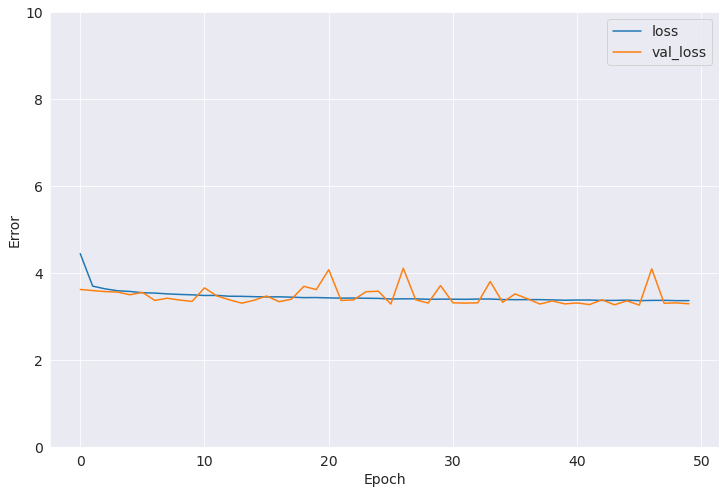

In [133]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [134]:
preds = dnn_model.predict(test_scalin, batch_size=Batch, verbose=1)

78/78 [==============================] - 0s 1ms/step


In [135]:
sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
sub_df['fare_amount'] = preds
sub_df.to_csv('DNN_Submission.csv', index=None)

 # Future Work
 
 - Claculate density for dropoff location and see how it can affect fare amount
 - Train on GPU with entire dataset using `dask`, `cudf` and `cuml`